# SENTIMENT ANALYSIS
IT IS DONE BY TRAINING A MODEL AND EXTRACTING EDA FOLLOWED BY NLP

-The data consist of various comments which are negative,postive and neutral

-The task is to extract valuable insights based to public by ommiting al the racist comment

-There are certain factors that can be used to classify that the given comment is sexit or racist

-'1' denotes postive comment while -1 dentoes that the comment is negative where as 0 denotes that the comment is neutral.

-We will start the analysis through preprocessing.

DATA PREPROCESSING

In [1]:
!pip install wordcloud==1.9.3


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
sns.set()
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')
# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Importing** **dataset**

In [3]:
df=pd.read_csv('/work/Twitter_Data.csv (1).zip')

In [4]:
df.head(100)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
95,country prospers when the women the country ar...,0.0
96,sabbash mera vote for peppermit abvp,0.0
97,yogi adityanath hold 100 rallies seek votes fo...,0.0
98,from the very beginningmodi doing wada faramos...,-1.0


#Data preprocessing

-the data has already been processed where the tokens hashtags and other special characters are removed from the dataset by preproccessing

In [5]:
textdf = df.drop_duplicates('clean_text')

In [6]:
#shape of the data
print("Shape of data after deletion:",textdf["clean_text"].shape)

Shape of data after deletion: (162977,)


In [7]:
def polarity(clean_text):
    return TextBlob(clean_text).sentiment.polarity

In [8]:
#classifying the categories according to the given record
#FEATURE ENGINEERING HAS ALSO BEEN DONE AS A PART OF EDA 
def analysis(label): 
  if label<0:
    return 'NEGATIVE'
  elif label>=1:
    return 'POSITIVE'
  elif label==0:
    return 'NEUTRAL'

In [9]:
textdf['analysis'] = textdf['category'].apply(analysis)
textdf.head(10)

/tmp/ipykernel_556/1843080507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textdf['analysis'] = textdf['category'].apply(analysis)


,clean_text,category,analysis
0,when modi promised “minimum government maximum...,-1.0,NEGATIVE
1,talk all the nonsense and continue all the dra...,0.0,NEUTRAL
2,what did just say vote for modi welcome bjp t...,1.0,POSITIVE
3,asking his supporters prefix chowkidar their n...,1.0,POSITIVE
4,answer who among these the most powerful world...,1.0,POSITIVE
5,kiya tho refresh maarkefir comment karo,0.0,NEUTRAL
6,surat women perform yagna seeks divine grace f...,0.0,NEUTRAL
7,this comes from cabinet which has scholars lik...,0.0,NEUTRAL
8,with upcoming election india saga going import...,1.0,POSITIVE
9,gandhi was gay does modi,1.0,POSITIVE


/tmp/ipykernel_556/1928214769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='analysis', y='count', data=hello, palette='cubehelix')


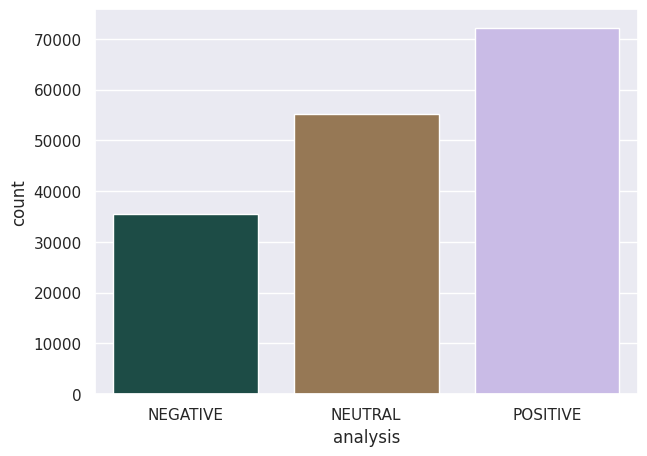

In [10]:
hello = textdf.groupby('analysis').size().reset_index(name='count')
plt.figure(figsize=(7, 5))
sns.barplot(x='analysis', y='count', data=hello, palette='cubehelix')
plt.show()

Text(0.5, 1.0, 'Distribution of category comment')

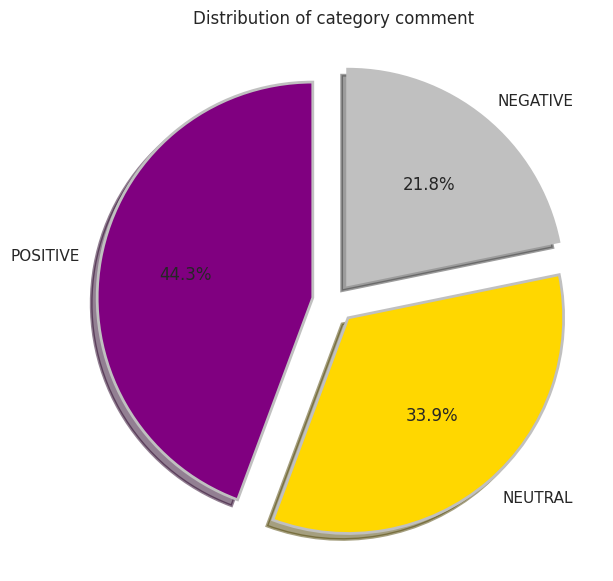

In [11]:
fig = plt.figure(figsize=(8,7))
colors = ("purple", "gold", "silver")
wp = {'linewidth':2, 'edgecolor':"silver"}
tags = textdf['analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of category comment')

In [12]:
#visualizing the top 5 postive comments
comments = textdf[textdf.analysis == 'POSITIVE']
comments = comments.sort_values(['category'], ascending= False)
comments.head()

,clean_text,category,analysis
2,what did just say vote for modi welcome bjp t...,1.0,POSITIVE
108013,mam ask the same question your brother mom bot...,1.0,POSITIVE
108020,political parties have the polls only meet the...,1.0,POSITIVE
108019,rahul sure have half your followers are modi b...,1.0,POSITIVE
108018,sanjay singh right modi kaput and should inter...,1.0,POSITIVE


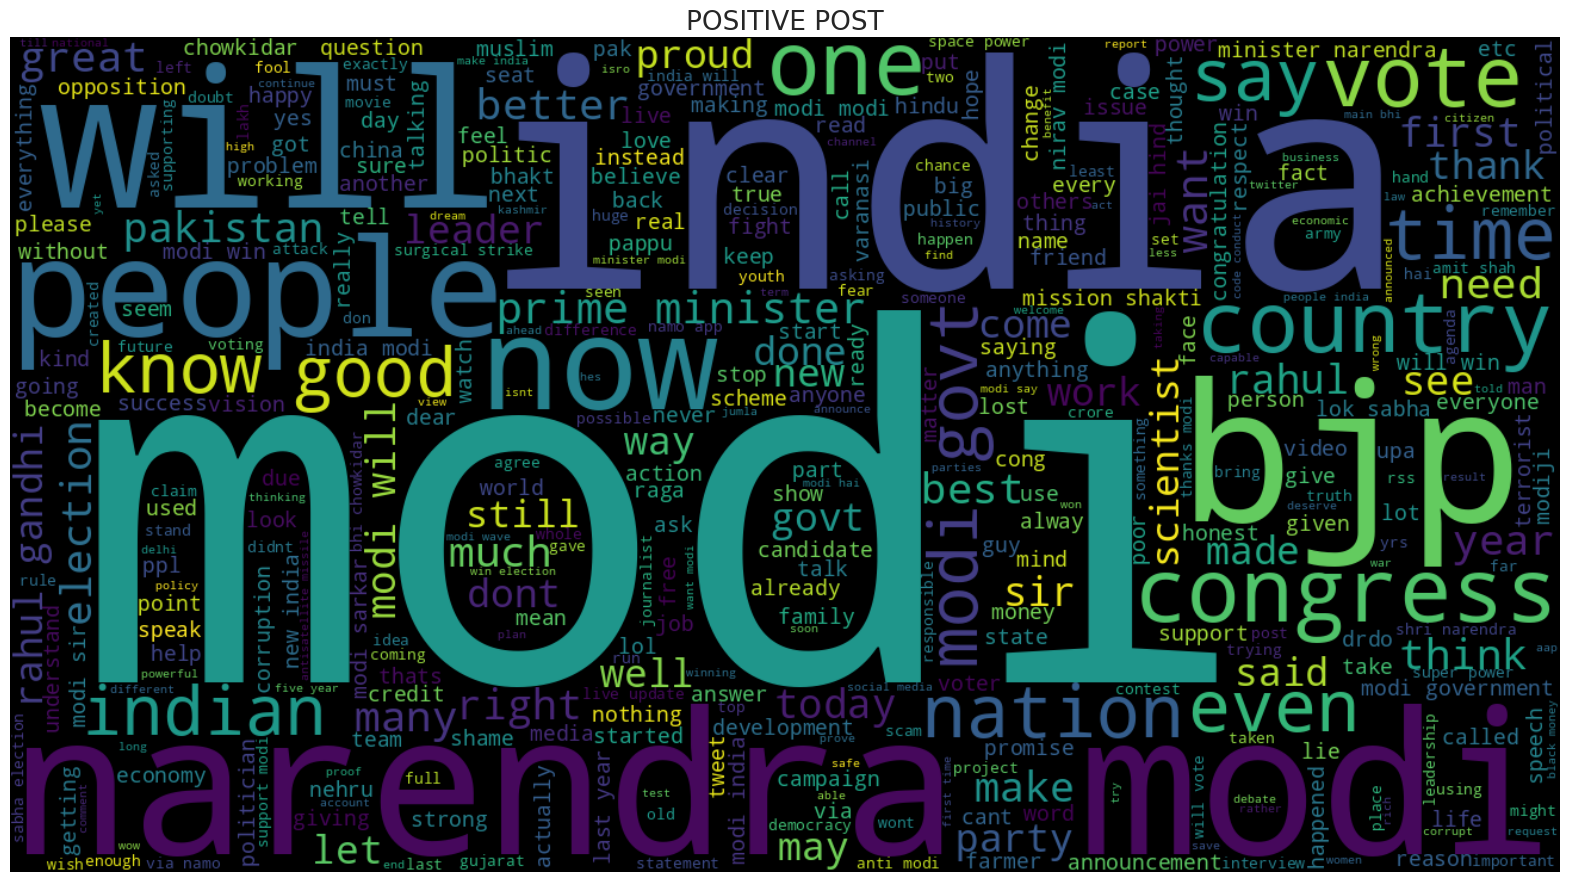

In [13]:
clean_text = ' '.join([word for word in comments['clean_text']])
plt.figure(figsize=(20,15), facecolor='white')
wordcloud = WordCloud(max_words=400, width=1300, height=700).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('POSITIVE POST', fontsize=19)
plt.show()

In [14]:
#VISUALIZATION OF NEGATIVE POST
comments= textdf[textdf.analysis == 'NEGATIVE']
comments= comments.sort_values(['category'], ascending= False)
comments.head()

,clean_text,category,analysis
0,when modi promised “minimum government maximum...,-1.0,NEGATIVE
109260,bhai dont spread half truth defame modi,-1.0,NEGATIVE
109239,khuda kasam will put modi jail national confer...,-1.0,NEGATIVE
109240,mrmodi people have already given you one chanc...,-1.0,NEGATIVE
109243,modijaitley and gadkari are saying this not po...,-1.0,NEGATIVE


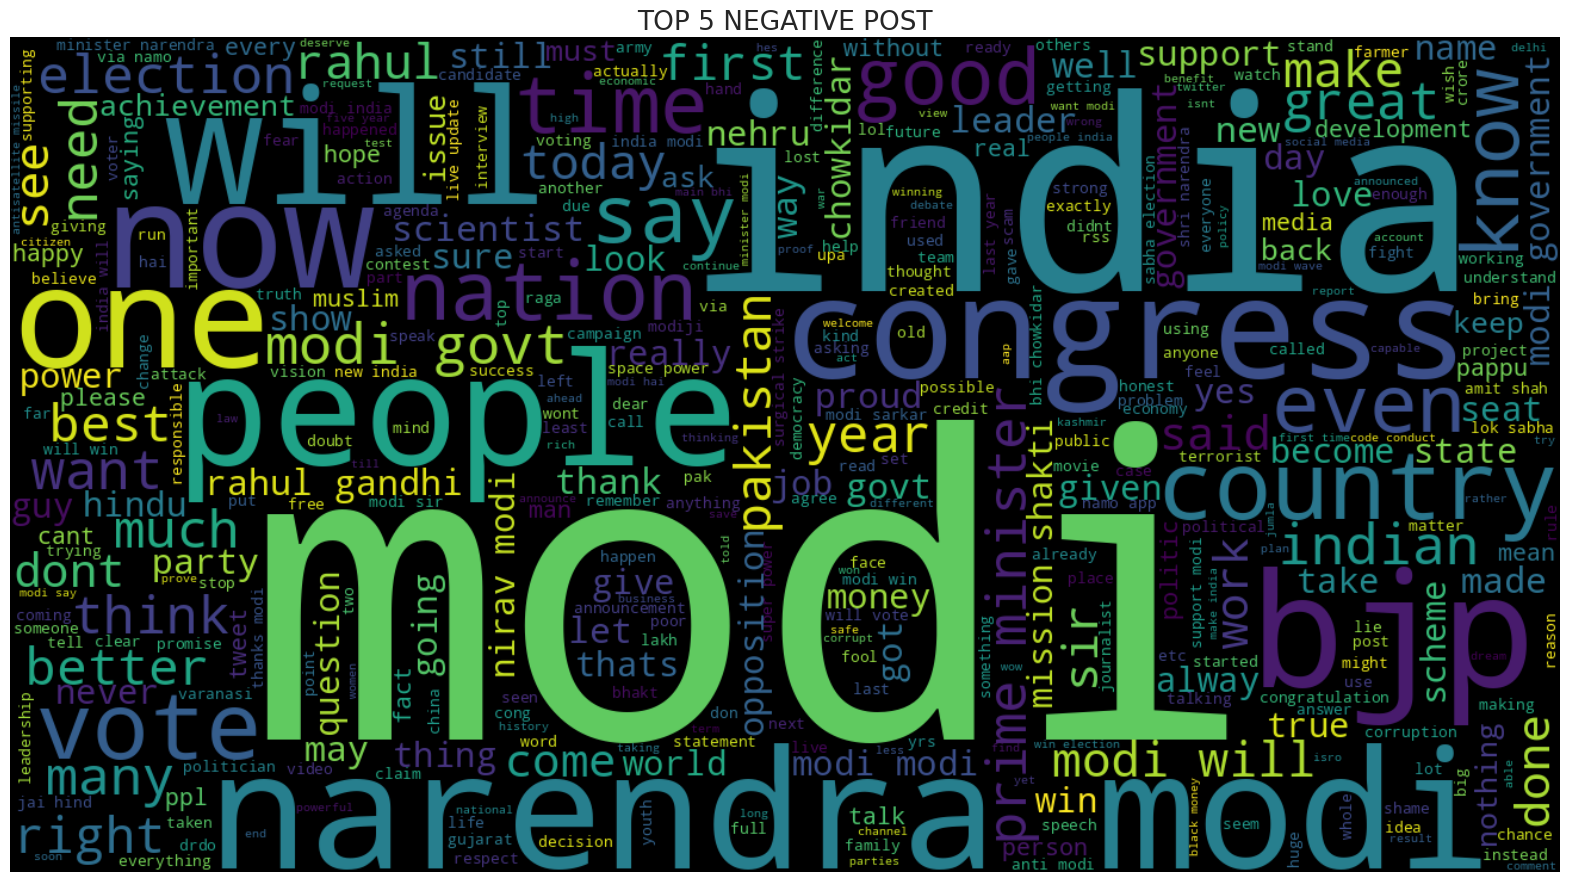

In [15]:
plt.figure(figsize=(20, 15), facecolor='white')
wordcloud = WordCloud(max_words=400, width=1300, height=700).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('TOP 5 NEGATIVE POST', fontsize=19)
plt.show()

In [16]:
#VISUALIZATION OF NEUTRAL POST
comments = textdf[textdf.analysis == 'NEUTRAL']
comments = comments.sort_values(['category'], ascending= False)
comments.head()

,clean_text,category,analysis
1,talk all the nonsense and continue all the dra...,0.0,NEUTRAL
108899,its about perception madam today urmila mataon...,0.0,NEUTRAL
108905,voting modi its threat constitution bolne wale...,0.0,NEUTRAL
108914,\nmodi …you said you will give tax incentives ...,0.0,NEUTRAL
108915,when modi spoke white paper wish arnab had ask...,0.0,NEUTRAL


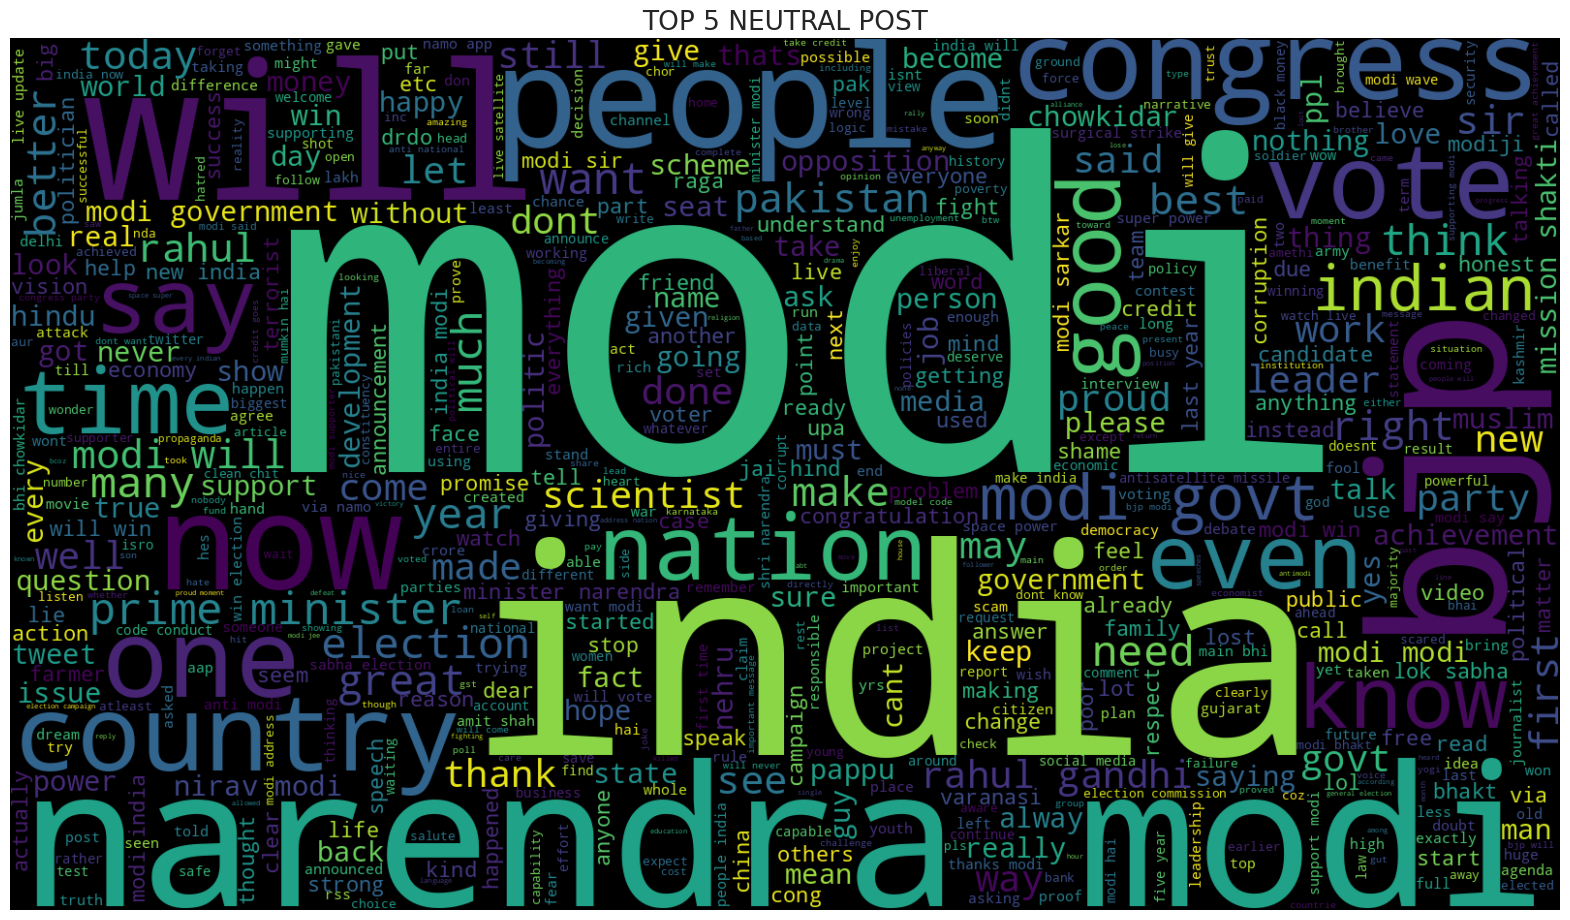

In [17]:
plt.figure(figsize=(20, 15), facecolor='white')
wordcloud = WordCloud(max_words=600, width=1600, height=900).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('TOP 5 NEUTRAL POST', fontsize=19)
plt.show()

#TEST TRAIN SPLIT

In [18]:
xtrain=textdf
xtest=textdf
xtrain

,clean_text,category,analysis
0,when modi promised “minimum government maximum...,-1.0,NEGATIVE
1,talk all the nonsense and continue all the dra...,0.0,NEUTRAL
2,what did just say vote for modi welcome bjp t...,1.0,POSITIVE
3,asking his supporters prefix chowkidar their n...,1.0,POSITIVE
4,answer who among these the most powerful world...,1.0,POSITIVE
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,NEGATIVE
162976,dear rss terrorist payal gawar what about modi...,-1.0,NEGATIVE
162977,did you cover her interaction forum where she ...,0.0,NEUTRAL
162978,there big project came into india modi dream p...,0.0,NEUTRAL


In [19]:
len(xtrain)
length=list()
for i in range(len(xtrain)):
  textl=(len(str(xtrain.iloc[i,1])))
  length.append(textl)

In [20]:
xtrain['length']=length

/tmp/ipykernel_556/2798619383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['length']=length


In [21]:
xtrain.head()

,clean_text,category,analysis,length
0,when modi promised “minimum government maximum...,-1.0,NEGATIVE,4
1,talk all the nonsense and continue all the dra...,0.0,NEUTRAL,3
2,what did just say vote for modi welcome bjp t...,1.0,POSITIVE,3
3,asking his supporters prefix chowkidar their n...,1.0,POSITIVE,3
4,answer who among these the most powerful world...,1.0,POSITIVE,3


In [22]:
positive=xtrain[xtrain['category']==1]
positive.describe()
positive

,clean_text,category,analysis,length
2,what did just say vote for modi welcome bjp t...,1.0,POSITIVE,3
3,asking his supporters prefix chowkidar their n...,1.0,POSITIVE,3
4,answer who among these the most powerful world...,1.0,POSITIVE,3
8,with upcoming election india saga going import...,1.0,POSITIVE,3
9,gandhi was gay does modi,1.0,POSITIVE,3
...,...,...,...,...
162969,objective cover everything from akhlaq ramalin...,1.0,POSITIVE,3
162970,raga knows dat wont spared modi courts for his...,1.0,POSITIVE,3
162972,engine growth modi unveils indias first 12000 ...,1.0,POSITIVE,3
162973,modi promised 2014 lok sabha elections that be...,1.0,POSITIVE,3


In [23]:
negative=xtrain[xtrain['category']==-1]
negative.describe()
negative

,clean_text,category,analysis,length
0,when modi promised “minimum government maximum...,-1.0,NEGATIVE,4
15,vote such party and leadershipwho can take fas...,-1.0,NEGATIVE,4
19,didn’ write chowkidar does mean ’ anti modi tr...,-1.0,NEGATIVE,4
21,with firm belief the leadership shri narendra ...,-1.0,NEGATIVE,4
23,sultanpur uttar pradesh loksabha candidate sel...,-1.0,NEGATIVE,4
...,...,...,...,...
162956,when narender modi contested two seats was not...,-1.0,NEGATIVE,4
162962,modi decimates congress front crores congress ...,-1.0,NEGATIVE,4
162967,azamgarh please poor working requirement jogia...,-1.0,NEGATIVE,4
162975,why these 456 crores paid neerav modi not reco...,-1.0,NEGATIVE,4


#TOKENIZATION

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
sdata=['hello wecome to coding','nice to meet u','may i know your intrest']
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(sdata)
vectorizer.get_feature_names_out()

array(['coding', 'hello', 'intrest', 'know', 'may', 'meet', 'nice', 'to',
       'wecome', 'your'], dtype=object)

In [26]:
x.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 1]])

In [27]:
st=stopwords.words('english')
def msgcleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed
    msgcleaning('hello nice to meet you modiji')

In [28]:
import string
import pandas as pd

def clean_and_convert_to_string(value):
    if pd.isnull(value):  # Check if the value is NaN
        return ""          # Return an empty string for missing values
    else:
        return str(value)
xtrain_clean= xtrain['clean_text'].apply(clean_and_convert_to_string).apply(msgcleaning)

In [29]:
xtrain['category'][5]


0.0

In [30]:
xtrain_clean[5]

'kiya tho refresh maarkefir comment karo'

In [31]:
data=xtrain_clean.tolist()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
tweetconverter=CountVectorizer().fit_transform(data)

In [33]:
tweetconverter.shape

(162977, 106907)

In [34]:
x1=tweetconverter
y=xtrain['category']

#NAIVE BAYES MODEL

- They make out simple assumptions which denotes the independence between the features.

- The assumption that they make is naive but the fetures are independent of each other which denotes that the accuracy produce my this mehtod will be more

- In most of the real world data the features are dependent on each other.

In [35]:
x1.shape

(162977, 106907)

In [36]:
y.shape

(162977,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB

# Drop NaN values from y_train before fitting the model
y_train_nonan = y_train.dropna()
NB_classifier = MultinomialNB()
x1.shape

(162977, 106907)

In [40]:
y.shape

(162977,)

In [41]:
X_train_nonan, X_test_nonan, y_train_nonan, y_test_nonan = train_test_split(x1[y.notna()], y.dropna(), test_size = 0.2)
NB_classifier.fit(X_train_nonan, y_train_nonan)

MultinomialNB()

In [42]:
y_pred = NB_classifier.predict(X_test_nonan)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
cm = confusion_matrix(y_test_nonan, y_pred)
cm

array([[ 4266,   437,  2350],
       [  707,  6491,  3785],
       [ 1124,   565, 12869]])

<AxesSubplot: >

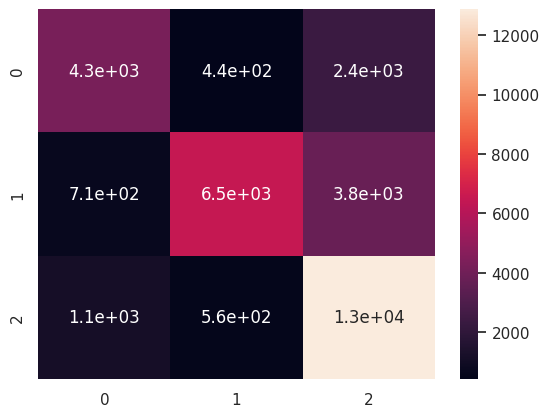

In [45]:
sns.heatmap(cm, annot = True)

In [46]:
ac = accuracy_score(y_test_nonan, y_pred)
ac

0.7248573357059581

In [47]:
print(classification_report(y_test_nonan, y_pred))

              precision    recall  f1-score   support

        -1.0       0.70      0.60      0.65      7053
         0.0       0.87      0.59      0.70     10983
         1.0       0.68      0.88      0.77     14558

    accuracy                           0.72     32594
   macro avg       0.75      0.69      0.71     32594
weighted avg       0.75      0.72      0.72     32594



THE ACCURACY RANGE IS 80% BY USING NAIVE BAYES 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465f362d-158c-47df-86be-9ea859bfe1b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>